<a href="https://colab.research.google.com/github/NastiiaKoval/Machine-Learning/blob/main/%D0%9A%D0%BE%D0%B2%D0%B0%D0%BB%D1%8C_%D0%BF%D1%80_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt


## Завдання 1: Лінійна регресія на основі Diabetes Dataset

1. Вивести перших 5 рядків.

2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення.

3. Перевірити наявність дублікатів, при виявленні – видалити.

4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення.

5. Перевірити тип даних. При необхідності замінити тип даних на числовий.

In [16]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
data = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
data['target'] = diabetes.target

In [17]:
# Виведення перших 5 рядків
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [40]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,0.468326,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,0.499561,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,0.000000,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,0.000000,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,0.000000,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,1.000000,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,1.000000,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [18]:
# Перевірка наявності пропусків
data.isnull().sum()

# пропущених значень не виявлено

,0
age,0
sex,0
bmi,0
bp,0
s1,0
s2,0
s3,0
s4,0
s5,0
s6,0


In [19]:
# Перевірка наявності дублікатів
data.drop_duplicates(inplace=True)

In [20]:
# Перевірка типів даних
print(data.dtypes)

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [21]:
# Зміна на бінарні значення в колонці sex
data.sex.unique()

array([ 0.05068012, -0.04464164])

In [22]:
data['sex'] = data['sex'].apply(lambda x: 1 if x > 0 else 0)

In [23]:
data['sex'].unique()

array([1, 0])

6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.
Побудувати теплову карту кореляції.

7. Масштабувати ознаки.

8. Поділити дані на тренувальну і тестову вибірки.
9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число).
10. Вивести коефіцієнт детермінації і середньоквадратичну помилку.
11. Побудувати графіки.

12. Вивести справжні і прогнозовані значення.


In [24]:
# Обрахунок кореляції
correlation = data.corr()
print(correlation['target'].sort_values(ascending=False))

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


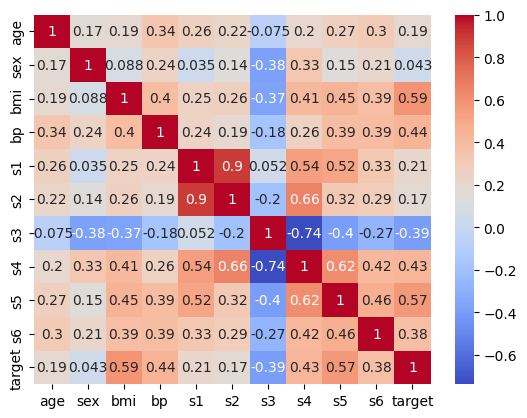

In [25]:
# Побудова теплової карти кореляцій
sns.heatmap(correlation, annot=True, cmap='coolwarm');

In [26]:
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

Обираємо найбільш корилюючі ознаки для вхідних даних.

In [27]:
inputs = data[['bmi', 's5', 'bp', 's4']]

In [28]:
targets = data['target']

In [29]:
# Масштабування даних
scaler = StandardScaler()
X_scaled = scaler.fit_transform(inputs)

In [30]:
# Поділ даних на тренувальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, targets, test_size=0.2, random_state=42)

# Лінійна регресія
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

In [31]:
# RandomForest регресія
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

In [32]:
# Оцінка моделей
print(f'Лінійна регресія R2: {r2_score(y_test, y_pred_lr)}')
print(f'Лінійна регресія MSE: {mean_squared_error(y_test, y_pred_lr)}')
print(f'RandomForest регресія R2: {r2_score(y_test, y_pred_rf)}')
print(f'RandomForest регресія MSE: {mean_squared_error(y_test, y_pred_rf)}')

Лінійна регресія R2: 0.4525840776044413
Лінійна регресія MSE: 2900.2926264058574
RandomForest регресія R2: 0.43475868768207904
RandomForest регресія MSE: 2994.734247191011


У цьому випадку обидві моделі мають R² трохи більше 0.4, що означає, що вони пояснюють трохи більше 40% варіації в даних. Проте лінійна регресія дещо краще прогнозує дані.

Значення MSE для обох моделей є досить високими, що вказує на те, що моделі роблять значні помилки в передбаченнях.

In [33]:
# Порівнюємо справжні та прогнозовані значення
print("Справжні значення:", y_test.values[:5])
print("Прогнозовані значення (Лінійна регресія):", y_pred_lr[:7])
print("Прогнозовані значення (RandomForest):", y_pred_rf[:7])

Справжні значення: [219.  70. 202. 230. 111.]
Прогнозовані значення (Лінійна регресія): [160.62004885 167.85736591 182.69163477 264.05656673 139.12852231
 118.87286998 281.86330736]
Прогнозовані значення (RandomForest): [182.59 174.26 186.62 259.27 124.05  82.79 272.26]


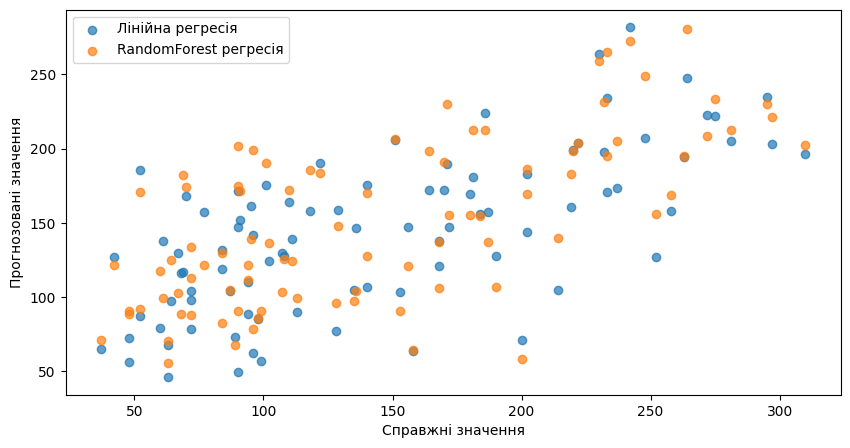

In [34]:
# Побудова графіків
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lr, label='Лінійна регресія', alpha=0.7)
plt.scatter(y_test, y_pred_rf, label='RandomForest регресія', alpha=0.7)
plt.xlabel('Справжні значення')
plt.ylabel('Прогнозовані значення')
plt.legend()
plt.show()

Лінійна регресія R2: 0.4525840776044413
RandomForest регресія R2: 0.43475868768207904


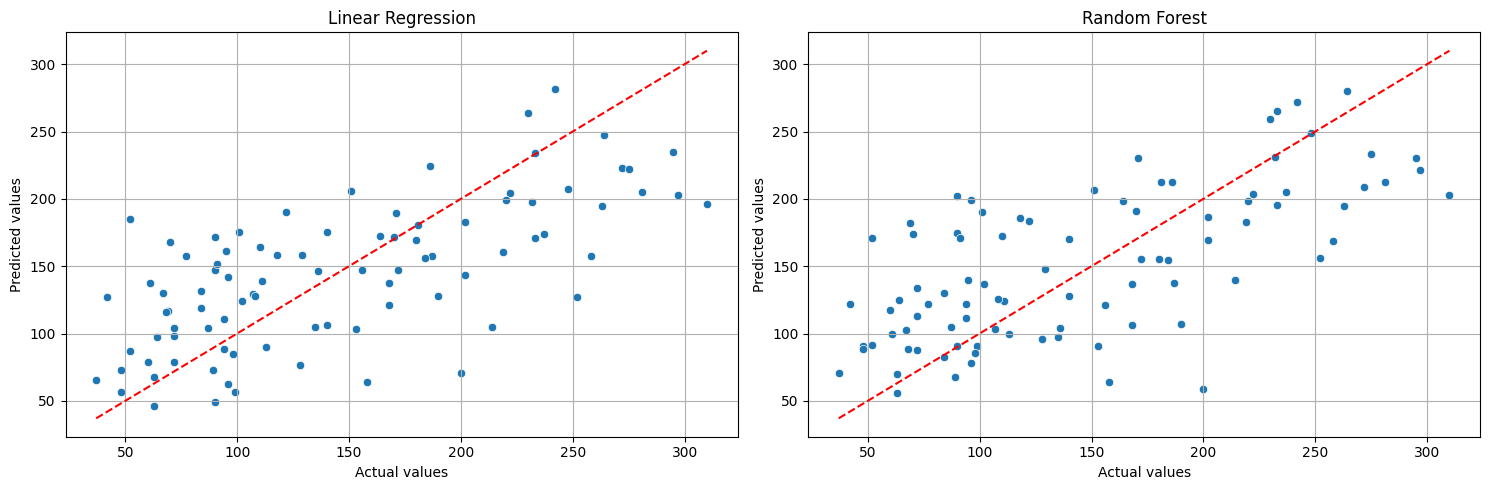

In [35]:
plt.figure(figsize=(15, 5))

# Scatter plot для Лінійної регресії
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=lin_reg.predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')
plt.grid(True)

# Scatter plot для Random Forest
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=rf_reg.predict(X_test))
sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Random Forest')
plt.grid(True)

# Відображення графіків
print(f'Лінійна регресія R2: {r2_score(y_test, y_pred_lr)}')
print(f'RandomForest регресія R2: {r2_score(y_test, y_pred_rf)}')
plt.tight_layout()
plt.show()

Отже, дві наші моделі роблять значі помилки в передбаченні. Проте лінійна регресія має дещо кращі показники. Потрібно налаштувати гіперпараметри для кращого прогнозування.

Розрахуємо ще rmse

In [36]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [38]:
import numpy as np

In [39]:
# Підготовка вхідних та цільових значень
inputs, targets = data[['bmi', 's5', 'bp', 's4']], data['target']

# Створюємо та навчаємо модель
model = LinearRegression().fit(inputs, targets)

# Робимо прогнози
predictions = model.predict(inputs)

# Рахуємо помилки
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 55.459618433628556


RMSE для лінійної регресії ≈ 55.46. Це вказує на те, що середня похибка передбачень складає близько 55 одиниць.

### Висновок


Модель лінійної регресії працює трохи краще, ніж RandomForest, але обидві моделі мають значну похибку. Високе значення MSE (≈2900) свідчить про те, що є простір для покращення моделей, можливо, через інші методи або вдосконалення обробки даних.

## Завдання 2: Лінійна регресія на основі California Housing Dataset

Провести попередній аналіз даних за схемою (дивиться вище).

Масштабувати ознаки.

Поділити дані на тренувальні і тестові.

Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.

Вивести R2      і      MSE. Побудувати графіки.

Вивести справжні і прогнозовані значення.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV


In [4]:
# Завантаження даних
california = fetch_california_housing()
data_house = pd.DataFrame(data=california.data, columns=california.feature_names)
data_house['target'] = california.target

# Виведення перших 5 рядків
data_house.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [14]:
data_house.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [5]:
# Попередній аналіз даних (аналогічно до Завдання 1)

print("\nПеревірка на пропущені значення:")
display(data_house.isnull().sum())
# data_house.fillna(data_house.mean(), inplace=True)

# Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:")
display(data_house.duplicated().sum())
# data_house.drop_duplicates(inplace=True)

display(data_house.dtypes)


Перевірка на пропущені значення:


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0



Перевірка наявності дублікатів:


0

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
target,float64


In [7]:
# Масштабування ознак
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_house.drop('target', axis=1))
y = data_house['target']

# Поділ на тренувальні і тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# Побудова моделей
models = {
    'Лінійна регресія': LinearRegression(),
    'RandomForest регресія': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge регресія': Ridge()
}

In [9]:
# Підбір параметрів для Ridge за допомогою GridSearchCV
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, ridge_params, cv=5)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.1, 1.0, 10.0, 100.0]})

In [10]:
print("Найкращі параметри для Ridge:", ridge_cv.best_params_)

Найкращі параметри для Ridge: {'alpha': 0.1}


In [11]:
# Підбір параметрів для RandomForest за допомогою GridSearchCV
rf_params = {
    'n_estimators': [50, 150],
    'max_depth': [3, 10],
    'min_samples_split': [2, 5]
}
rf = RandomForestRegressor(random_state=42)
rf_cv = GridSearchCV(rf, rf_params, cv=3, n_jobs=-1, verbose=2)
rf_cv.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 150]},
             verbose=2)

In [12]:
print("Найкращі параметри для RandomForest:", rf_cv.best_params_)

Найкращі параметри для RandomForest: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 150}


Linear Regression R2: 0.5757877060324511
Linear Regression MSE: 0.555891598695244


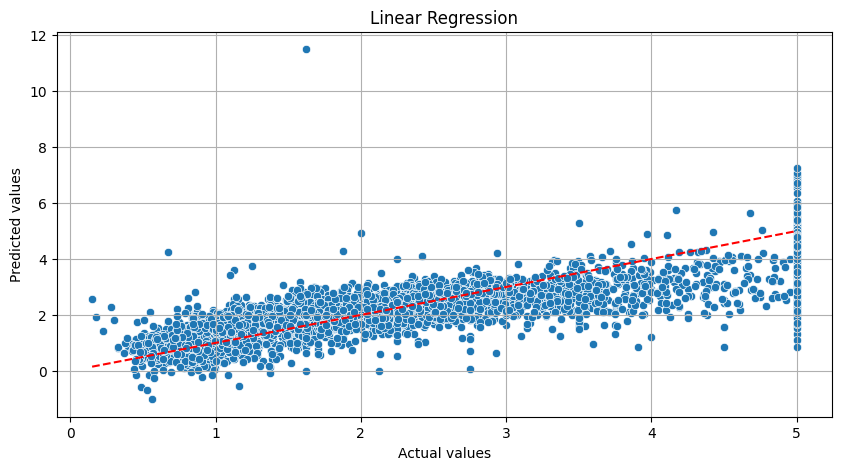

Ridge Regression R2: 0.5757907979394903
Ridge Regression MSE: 0.5558875470324999


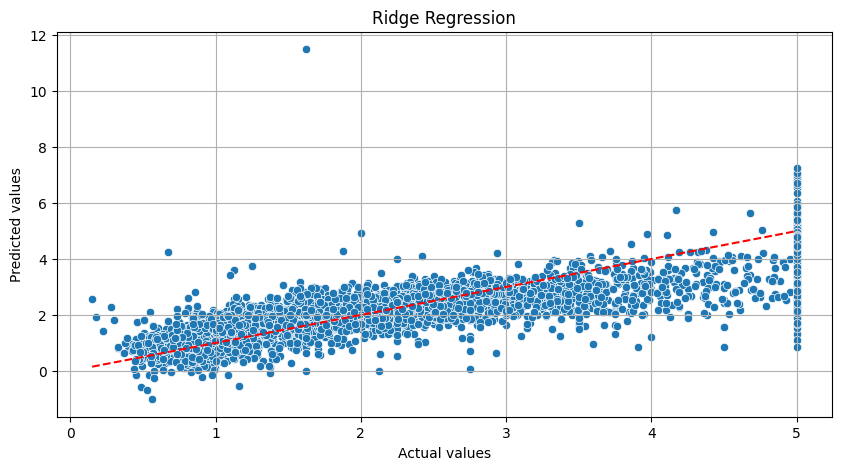

RandomForest Regression R2: 0.7745622062536517
RandomForest Regression MSE: 0.2954157089600349


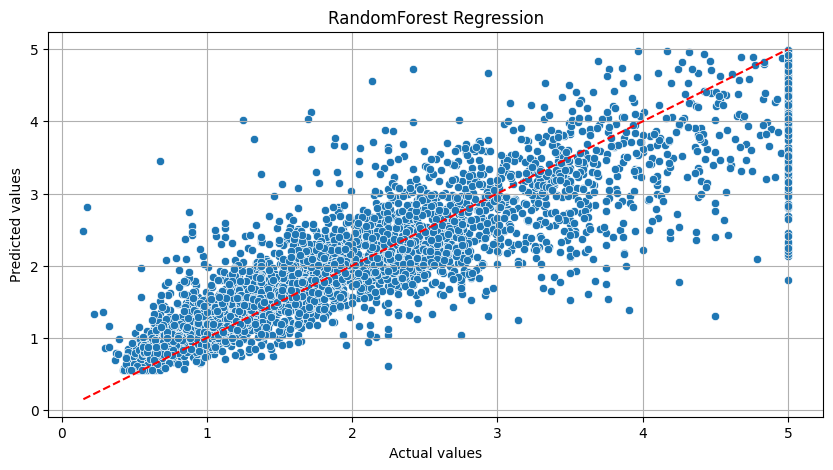

Справжні значення: [0.477   0.458   5.00001 2.186   2.78   ]


In [13]:
# Оцінка всіх моделей
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': ridge_cv.best_estimator_,
    'RandomForest Regression': rf_cv.best_estimator_
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} R2: {r2_score(y_test, y_pred)}')
    print(f'{name} MSE: {mean_squared_error(y_test, y_pred)}')

    # Побудова графіків
    plt.figure(figsize=(10,5))
    sns.scatterplot(x=y_test, y=y_pred)
    sns.lineplot(x=[min(y_test), max(y_test)], y=[min(y_test), max(y_test)], color='red', linestyle='--')
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title(name)
    plt.grid(True)
    plt.show()

# Порівнюємо
print("Справжні значення:", y_test.values[:5])

### Висновок

1. **Лінійна регресія**:
   - **R²**: 0.576
   - **MSE**: 0.556
   - Ця модель пояснює близько 57.6% варіації в цільовій змінній. Це помірний результат для лінійної регресії, і MSE на рівні 0.556 вказує на середній рівень похибок.

2. **Ridge регресія**:
   - **R²**: 0.576
   - **MSE**: 0.556
   - Ridge регресія дала майже ідентичні результати до лінійної регресії. Це означає, що регуляризація не вплинула суттєво на модель, оскільки модель лінійної регресії й так добре працювала. Таким чином, використання Ridge не покращило результат.

3. **RandomForest регресія**:
   - **R²**: 0.775
   - **MSE**: 0.295
   - **RandomForest** значно перевершує лінійну та Ridge регресії. Вона пояснює близько 77.5% варіації в цільовій змінній, що є набагато кращим результатом, ніж у лінійної моделі. MSE у 0.295 вказує на те, що модель передбачає значно точніше, ніж лінійні моделі.

Підсумок:
1. **Лінійні моделі (лінійна регресія та Ridge)** показали подібні результати, що свідчить про те, що немає сильної потреби в регуляризації за допомогою Ridge, якщо базова лінійна модель вже добре працює.
2. **RandomForest** явно є кращою моделлю для цього набору даних, оскільки значно перевершує лінійні моделі за обома метриками (R² та MSE). Це може бути через те, що дані мають нелінійні взаємозв'язки, які дерево рішень (RandomForest) краще виявляє.